<a href="https://colab.research.google.com/github/omkarjadhav-projects-700/Neural-Networks/blob/main/ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary libraries:
import numpy as np
import pandas as pd
%matplotlib inline
import tensorflow as tf
import keras
import sklearn.metrics
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
df = pd.read_csv("//train.csv")
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
## drop the unnecessary columns:
df.drop(columns = ["id", "CustomerId", "Surname"], inplace = True)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [ ]:
# feature scaling:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
## initializing the standardscaler:

scaler = StandardScaler()

In [ ]:
## list of numerical features:

num = df.select_dtypes("number").columns
num

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']] = scaler.fit_transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']])

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.144135,France,Male,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,0
1,-0.367706,France,Male,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,0
2,0.268974,France,Male,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,0
3,-0.941966,France,Male,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,0
4,0.743362,Spain,Male,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,0.131651,Spain,Female,-0.578074,-1.076334,-0.883163,-1.013348,0.571263,1.00447,0.382957,0
165030,1.692140,France,Male,-0.352523,-0.719973,-0.883163,-1.013348,-1.750507,-0.99555,0.382951,0
165031,-1.141708,France,Male,-0.803625,-0.007253,-0.883163,-1.013348,0.571263,1.00447,0.295366,0
165032,-1.279031,Spain,Female,-0.916401,0.705467,1.688303,-1.013348,-1.750507,1.00447,-0.823217,0


In [ ]:
encoded1 = pd.get_dummies(df['Geography'], drop_first = True)
encoded1

,Germany,Spain
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True
...,...,...
165029,False,True
165030,False,False
165031,False,False
165032,False,True


In [ ]:
encoded2 = pd.get_dummies(df['Gender'], drop_first = True)
encoded2

,Male
0,True
1,True
2,True
3,True
4,True
...,...
165029,False
165030,True
165031,True
165032,False


In [ ]:
df.drop(columns = ["Geography", "Gender"], inplace = True)

In [ ]:
df1 = pd.concat([df, encoded1, encoded2], axis = 1)

In [ ]:
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,0,False,False,True
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,0,False,False,True
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,0,False,False,True
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,0,False,False,True
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.131651,-0.578074,-1.076334,-0.883163,-1.013348,0.571263,1.00447,0.382957,0,False,True,False
165030,1.692140,-0.352523,-0.719973,-0.883163,-1.013348,-1.750507,-0.99555,0.382951,0,False,False,True
165031,-1.141708,-0.803625,-0.007253,-0.883163,-1.013348,0.571263,1.00447,0.295366,0,False,False,True
165032,-1.279031,-0.916401,0.705467,1.688303,-1.013348,-1.750507,1.00447,-0.823217,0,False,True,False


In [ ]:
df = df1

In [ ]:
## seperate the output feature from the input features:

X = df.drop("Exited", axis = 1)
y = df["Exited"]

In [ ]:
### train-test split:

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((132027, 11), (33007, 11), (33007,), (132027,))

In [ ]:
### fitting of ANN to the dataset:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, Dropout, Input

In [ ]:
## initializing the ANN:

model = Sequential()

## input layer:
model.add(Input((X_train.shape[1],)))
# model.add(Dropout(rate = 0.2))

## 1st hideen layer:
model.add(Dense(units = 10, activation = "relu"))
# model.add(Dropout(rate = 0.05))

#2nd hidden layer:
model.add(Dense(units = 5, activation = "relu"))
# model.add(Dropout(rate = 0.05))

# output layer:
model.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
### training the ANN:

model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["Accuracy"])

In [ ]:
### initialization of early stopping:

from tensorflow.keras.callbacks import EarlyStopping

stopping = EarlyStopping(monitor = "val_loss", patience = 20, min_delta = 0.01, verbose = 1)

In [ ]:
### initialization of early stopping:

from tensorflow.keras.callbacks import EarlyStopping

stopping = EarlyStopping(monitor = "val_loss", patience = 20, min_delta = 0.01, verbose = 1)

In [ ]:
model_training = model.fit(X_train, y_train, epochs = 1000, batch_size = 50, validation_split = 0.25, callbacks = stopping)

Epoch 1/1000
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - Accuracy: 0.7834 - loss: 0.4524 - val_Accuracy: 0.8517 - val_loss: 0.3537
Epoch 2/1000
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Accuracy: 0.8522 - loss: 0.3485 - val_Accuracy: 0.8582 - val_loss: 0.3370
Epoch 3/1000
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.8594 - loss: 0.3340 - val_Accuracy: 0.8623 - val_loss: 0.3333
Epoch 4/1000
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.8608 - loss: 0.3328 - val_Accuracy: 0.8618 - val_loss: 0.3324
Epoch 5/1000
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - Accuracy: 0.8618 - loss: 0.3313 - val_Accuracy: 0.8630 - val_loss: 0.3303
Epoch 6/1000
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Accuracy: 0.8625 - loss: 0.3291 - val_Accuracy: 0.8632 - val_loss: 0.3283
Epoch 7/1000
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.8631 - loss: 0.3260 - val_Accuracy: 0.8641 - val_loss: 0.3267
Epoch 8/1000
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Accuracy: 0.8640 

In [ ]:
model_training.history.keys()

dict_keys(['Accuracy', 'loss', 'val_Accuracy', 'val_loss'])

In [ ]:
### plot of accuracy v/s validation accuracy:

import matplotlib.pyplot as plt

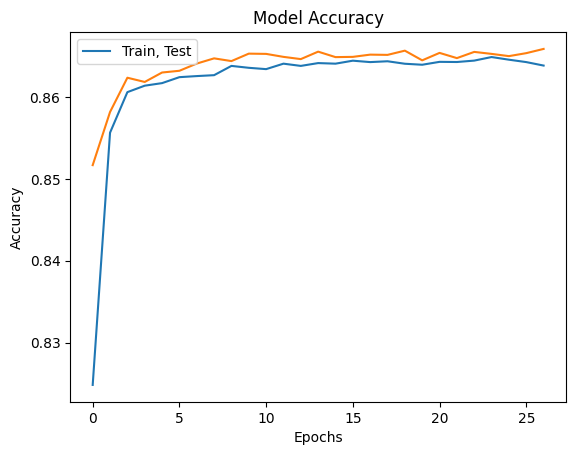

In [ ]:
plt.plot(model_training.history['Accuracy'])
plt.plot(model_training.history['val_Accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train, Test"], loc = "upper left")
plt.show()

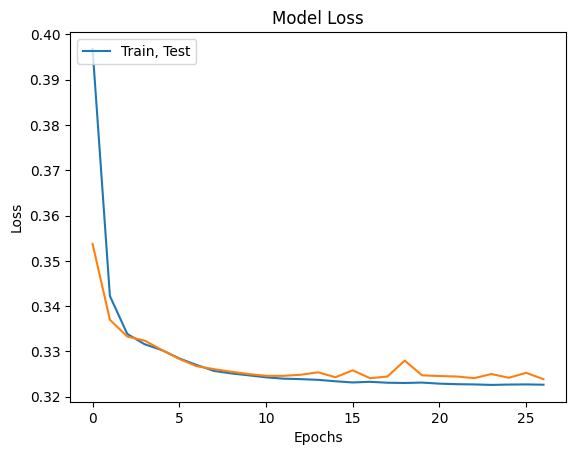

In [ ]:
### plot for loss v/s validation loss:

plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train, Test"], loc = "upper left")
plt.show()

In [ ]:
### calculation of predicted values:

y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)   # ths step assumes that we are taking the values >= 0.5 as "1" and below 0.5 as "0".

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   


In [ ]:
y_pred.shape

(33007, 1)

In [ ]:
### performance metrics:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[24776,  1276],
       [ 3195,  3760]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8645438846305329

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.75      0.54      0.63      6955

    accuracy                           0.86     33007
   macro avg       0.82      0.75      0.77     33007
weighted avg       0.86      0.86      0.86     33007



In [ ]:
### weights of the model:

weights = model.get_weights()
print(weights)

[array([[ 1.29917944e-02,  6.46313578e-02, -6.01224080e-02,
         3.11265066e-02, -7.04993233e-02,  1.42037719e-01,
        -5.97770624e-02,  8.38922262e-02, -1.42157469e-02,
         6.07747072e-03],
       [-9.38526690e-02, -6.83243930e-01, -5.80830872e-01,
         2.50220120e-01,  5.70546389e-01,  7.80032396e-01,
         4.97588992e-01, -8.37485492e-01, -1.59703940e-01,
        -1.04833301e-02],
       [-4.49413955e-02,  3.27774920e-02, -1.23913260e-02,
         4.43096869e-02, -4.78489213e-02, -3.50940898e-02,
        -4.07619961e-02,  8.96661542e-03, -5.06399684e-02,
         1.53024923e-02],
       [-1.73712877e-04, -2.44820774e-01,  1.08134426e-01,
        -1.00938356e+00, -4.84585971e-01,  4.59242314e-02,
        -1.44861773e-01, -7.13872984e-02, -4.17788289e-02,
        -1.09735417e+00],
       [ 1.50757372e+00, -2.38085225e-01,  1.36150531e-02,
        -5.00144474e-02,  1.55654773e-01, -2.00529080e-02,
        -2.98691869e-01, -2.35341936e-01, -1.37844324e+00,
        -8

In [ ]:
### Overall sumary of the model:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)